# Changing the lookback length (Strongbridge)
In this notebook I will recompute the last exposure date differences for different lookback length

In [1]:
import pandas as pd
import pyarrow.feather as feather
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_cols(df, stem):
    return [col for col in list(df) if stem in col]

In [3]:
filename = "F:\\Valentina\\Experiments\\exp_lookback\\extra_data\\st_combined_train_unmatched_test_capped_freq_datediff_alldays.feather"

In [4]:
#del df
df = feather.read_feather(filename)

In [5]:
last_cols = get_cols(df, 'LAST_EXP')

In [6]:
def cut_lookback(x, max_days):
    return x.where(x <= max_days, np.nan)

### Median last exp DT distribution by number of years in the fixed lookback

Text(0,0.5,'Count of predictors')

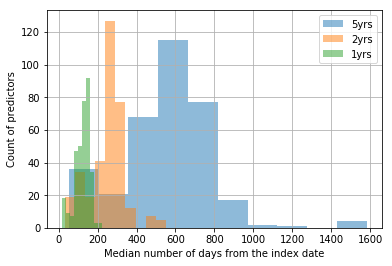

In [10]:
cut_list = [365*5, 365*2, 365]
for max_days in cut_list:
    df_tmp = df[last_cols].copy()
    for col in last_cols:
        df_tmp[col] = cut_lookback(df_tmp[col], max_days)
    df_tmp[last_cols].median().hist(alpha = 0.5, label = str(int(max_days/365)) + "yrs") 
    del df_tmp
plt.legend()
plt.xlabel("Median number of days from the index date")
plt.ylabel("Count of predictors")

### Is the change in the distributions different bewtween the classes?

### How many predictors are we loosing?

In [36]:
#lost predictor <- number of missing values == number of patients
n_id = df.shape[0]
cut_list = [365*5, 365*2, 365, 365/2, 365/4]
null_df = pd.DataFrame(columns = [ str(x) for x in cut_list])
for max_days in cut_list:
    df_tmp = df[last_cols].copy()
    null_values = []
    for col in last_cols:
        df_tmp[col] = cut_lookback(df_tmp[col], max_days)
        null_values.append(df_tmp[col].isnull().sum())
    null_df[str(max_days)] = null_values
    del df_tmp

In [30]:
n_id = df.shape[0]
n_id

1629888

In [39]:
for col in list(null_df):
    print("Lookback (months)",round(float(col)/365*12))
    print(null_df[col].apply(lambda x: (x< n_id)).sum())

Lookback (months) 60
341
Lookback (months) 24
341
Lookback (months) 12
341
Lookback (months) 6
341
Lookback (months) 3
341


No predictors are missed. Good.

### Ratio of missing last expsoure dates, by lookback

In [40]:
null_df.head()

,1825,730,365,182.5,91.25
0,1605515,1618083,1624080,1626539,1627879
1,1592962,1608588,1616563,1621198,1624194
2,1516132,1555698,1580426,1598008,1608219
3,1409926,1516028,1564068,1591224,1605908
4,1249470,1419236,1500319,1551976,1580585


In [44]:
null_df_percent = null_df.apply(lambda x: x/n_id, axis=1)

Text(0.5,1,'Missing last exp DT vs lookback length')

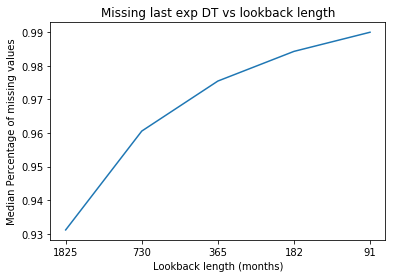

In [81]:
ax = null_df_percent.T.median(axis=1).plot(kind='line')
ax.set_xlabel('Lookback length (months)')
ax.set_ylabel('Median Percentage of missing values')
ax.set_xticks(np.arange(0,5,1))
ax.set_xticklabels([round(int(x)) for x in cut_list])
ax.set_title("Missing last exp DT vs lookback length")

### Ratio of missing last expsoure dates by cohort

In [87]:
null_df_pos = pd.DataFrame(columns = [ str(x) for x in cut_list])
for max_days in cut_list:
    df_tmp = df[df["label"] == 1][last_cols].copy()
    null_values = []
    for col in last_cols:
        df_tmp[col] = cut_lookback(df_tmp[col], max_days)
        null_values.append(df_tmp[col].isnull().sum())
    null_df_pos[str(max_days)] = null_values
    del df_tmp

In [88]:
n_pos = df[df["label"]==1].shape[0]
null_df_pos = null_df_pos.apply(lambda x: x/n_pos, axis=1)
n_pos

1553

In [91]:
null_df_neg = pd.DataFrame(columns = [ str(x) for x in cut_list])
for max_days in cut_list:
    df_tmp = df[df["label"] == 0][last_cols].copy()
    null_values = []
    for col in last_cols:
        df_tmp[col] = cut_lookback(df_tmp[col], max_days)
        null_values.append(df_tmp[col].isnull().sum())
    null_df_neg[str(max_days)] = null_values
    del df_tmp

In [92]:
n_neg = df[df["label"]==0].shape[0]
null_df_neg = null_df_neg.apply(lambda x: x/n_neg, axis=1)
n_neg

1628335

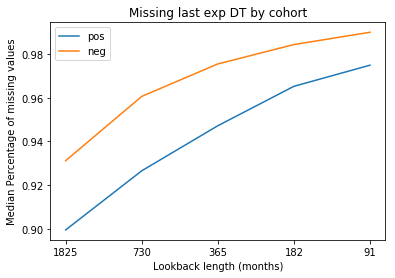

In [94]:
ax = null_df_pos.T.median(axis=1).plot(kind='line', label = "pos")
null_df_neg.T.median(axis=1).plot(kind='line', label = "neg")
ax.set_xlabel('Lookback length (months)')
ax.set_ylabel('Median Percentage of missing values')
ax.set_xticks(np.arange(0,5,1))
ax.set_xticklabels([round(int(x)) for x in cut_list])
ax.set_title("Missing last exp DT by cohort")
ax.legend()

In [96]:
list(df)

['PATIENT_ID',
 'test_patient_id',
 'index_date',
 'lookback_date',
 'label',
 'AGE',
 'GENDER',
 'D_7373_AVG_CLAIM_CNT',
 'D_7803_AVG_CLAIM_CNT',
 'D_7809_AVG_CLAIM_CNT',
 'D_7840_AVG_CLAIM_CNT',
 'D_7865_AVG_CLAIM_CNT',
 'D_7931_AVG_CLAIM_CNT',
 'D_4659_AVG_CLAIM_CNT',
 'D_7194_AVG_CLAIM_CNT',
 'D_7245_AVG_CLAIM_CNT',
 'D_V048_AVG_CLAIM_CNT',
 'D_V761_AVG_CLAIM_CNT',
 'D_2420_AVG_CLAIM_CNT',
 'D_2429_AVG_CLAIM_CNT',
 'D_2449_AVG_CLAIM_CNT',
 'D_2724_AVG_CLAIM_CNT',
 'D_4011_AVG_CLAIM_CNT',
 'D_4019_AVG_CLAIM_CNT',
 'D_5308_AVG_CLAIM_CNT',
 'D_7295_AVG_CLAIM_CNT',
 'D_7298_AVG_CLAIM_CNT',
 'D_V588_AVG_CLAIM_CNT',
 'D_7225_AVG_CLAIM_CNT',
 'D_7242_AVG_CLAIM_CNT',
 'D_7862_AVG_CLAIM_CNT',
 'D_3000_AVG_CLAIM_CNT',
 'D_496__AVG_CLAIM_CNT',
 'D_5188_AVG_CLAIM_CNT',
 'D_5990_AVG_CLAIM_CNT',
 'D_7291_AVG_CLAIM_CNT',
 'D_7806_AVG_CLAIM_CNT',
 'D_7807_AVG_CLAIM_CNT',
 'D_7860_AVG_CLAIM_CNT',
 'D_7879_AVG_CLAIM_CNT',
 'D_7890_AVG_CLAIM_CNT',
 'D_V723_AVG_CLAIM_CNT',
 'D_2689_AVG_CLAIM_CNT',
 'D

In [98]:
file_out = "F:\\Valentina\\Experiments\\exp_lookback\\extra_data\\" \
"st_combined_train_unmatched_test_capped_freq_datediff_alldays.csv"
df.to_csv(file_out, index=False)